In [7]:
# Classification Neural Network

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('bank_prep.csv')

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfsc = sc.fit_transform(df)
df['rooms'] = dfsc[:,0]
df['m2'] = dfsc[:,3]
df['price'] = dfsc[:,5]

In [5]:
# Splitting the dataset into the Training set and Test set (2 variables)
X = df.iloc[:, [0, 2]].values
y = df.iloc[:, 7].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [14]:
# Initialising the ANN
scnn = Sequential()

# Adding the input layer and the first hidden layer
scnn.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the second hidden layer
scnn.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid'))

# Adding the output layer
scnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
scnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=6, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=6, kernel_initializer="uniform")`
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [16]:
# Fitting the ANN to the Training set
scnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
480/480 [==============================] - 0s 416us/step - loss: 0.6932 - accuracy: 0.5042
Epoch 2/100
480/480 [==============================] - 0s 98us/step - loss: 0.6921 - accuracy: 0.5167
Epoch 3/100
480/480 [==============================] - 0s 96us/step - loss: 0.6892 - accuracy: 0.5167
Epoch 4/100
480/480 [==============================] - 0s 96us/step - loss: 0.6813 - accuracy: 0.6292
Epoch 5/100
480/480 [==============================] - 0s 96us/step - loss: 0.6624 - accuracy: 0.8000
Epoch 6/100
480/480 [==============================] - 0s 96us/step - loss: 0.6294 - accuracy: 0.8354
Epoch 7/100
480/480 [==============================] - 0s 110us/step - loss: 0.5889 - accuracy: 0.8396
Epoch 8/100
480/480 [==============================] - 0s 98us/step - loss: 0.5495 - accuracy: 0.8417
Epoch 9/100
480/480 [==============================] - 0s 100us/step - loss: 0.5160 - accuracy: 0.8417
Epoch 10/100
480/480 [==============================] - 0s 106us/step - loss: 0

480/480 [==============================] - 0s 98us/step - loss: 0.3079 - accuracy: 0.8521
Epoch 81/100
480/480 [==============================] - 0s 104us/step - loss: 0.3081 - accuracy: 0.8542
Epoch 82/100
480/480 [==============================] - 0s 100us/step - loss: 0.3085 - accuracy: 0.8521
Epoch 83/100
480/480 [==============================] - 0s 98us/step - loss: 0.3076 - accuracy: 0.8542
Epoch 84/100
480/480 [==============================] - 0s 96us/step - loss: 0.3075 - accuracy: 0.8542
Epoch 85/100
480/480 [==============================] - 0s 102us/step - loss: 0.3070 - accuracy: 0.8542
Epoch 86/100
480/480 [==============================] - 0s 102us/step - loss: 0.3067 - accuracy: 0.8521
Epoch 87/100
480/480 [==============================] - 0s 98us/step - loss: 0.3069 - accuracy: 0.8521
Epoch 88/100
480/480 [==============================] - 0s 96us/step - loss: 0.3065 - accuracy: 0.8521
Epoch 89/100
480/480 [==============================] - 0s 100us/step - loss: 0.30

In [17]:
# Predicting the Test set results
y_pred = scnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  7]
 [ 7 50]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


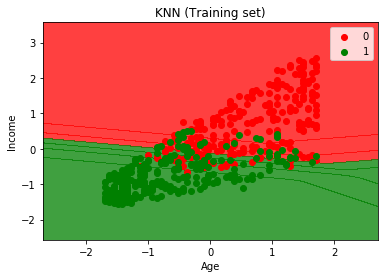

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, scnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


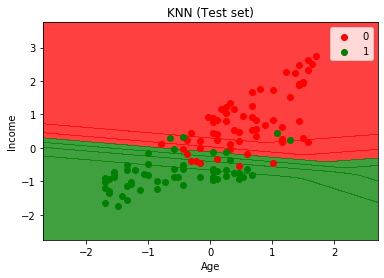

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, scnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [21]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
cnn.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=6, kernel_initializer="uniform")`
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [32]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
480/480 [==============================] - 0s 452us/step - loss: 0.6930 - accuracy: 0.5167
Epoch 2/100
480/480 [==============================] - 0s 96us/step - loss: 0.6914 - accuracy: 0.5167
Epoch 3/100
480/480 [==============================] - 0s 98us/step - loss: 0.6857 - accuracy: 0.5167
Epoch 4/100
480/480 [==============================] - 0s 96us/step - loss: 0.6675 - accuracy: 0.7042
Epoch 5/100
480/480 [==============================] - 0s 108us/step - loss: 0.6275 - accuracy: 0.8021
Epoch 6/100
480/480 [==============================] - 0s 98us/step - loss: 0.5754 - accuracy: 0.8375
Epoch 7/100
480/480 [==============================] - 0s 94us/step - loss: 0.5248 - accuracy: 0.8729
Epoch 8/100
480/480 [==============================] - 0s 96us/step - loss: 0.4776 - accuracy: 0.9042
Epoch 9/100
480/480 [==============================] - 0s 106us/step - loss: 0.4333 - accuracy: 0.9292
Epoch 10/100
480/480 [==============================] - 0s 104us/step - loss: 0

480/480 [==============================] - 0s 106us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 81/100
480/480 [==============================] - 0s 108us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 82/100
480/480 [==============================] - 0s 100us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 83/100
480/480 [==============================] - 0s 98us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 84/100
480/480 [==============================] - 0s 104us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 85/100
480/480 [==============================] - 0s 108us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 86/100
480/480 [==============================] - 0s 102us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 87/100
480/480 [==============================] - 0s 108us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 88/100
480/480 [==============================] - 0s 108us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 89/100
480/480 [==============================] - 0s 102us/step - loss: 

In [33]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  0]
 [ 0 57]]
